In [2]:
import time 
import requests
import cv2  
# pip3 install opencv-python
import operator
import numpy as np
import pandas as pd
import json

# Import library to display results
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline 
# Display images within Jupyter

# Variables

_url_emotion = 'https://api.projectoxford.ai/emotion/v1.0/recognize'
_url_face = 'https://api.projectoxford.ai/face/v1.0/detect'
_key_emotion = ''
_key_face = ''
_maxNumRetries = 10



headers_group = dict()
headers_group['Ocp-Apim-Subscription-Key'] = _key_face
headers_group['Content-Type'] = 'application/json'

headers_emotion = dict()
headers_emotion['Ocp-Apim-Subscription-Key'] = _key_emotion
headers_emotion['Content-Type'] = 'application/octet-stream'

headers_face = dict()
headers_face['Ocp-Apim-Subscription-Key'] = _key_face
headers_face['Content-Type'] = 'application/octet-stream'

In [3]:
def processRequestEmotion( json, data, headers, params ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:

        response = requests.request( 'post', _url_emotion, json = json, data = data, headers = headers, params = params )

        if response.status_code == 429: 

            print( "Message: %s" % ( response.json()['error']['message'] ) )

            if retries <= _maxNumRetries: 
                time.sleep(20) 
                retries += 1
                continue
            else: 
                print( 'Error: failed after retrying!' )
                break

        elif response.status_code == 200 or response.status_code == 201:

            if 'content-length' in response.headers and int(response.headers['content-length']) == 0: 
                result = None 
            elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str): 
                if 'application/json' in response.headers['content-type'].lower(): 
                    result = response.json() if response.content else None 
                elif 'image' in response.headers['content-type'].lower(): 
                    result = response.content
        else:
            print( "Error code: %d" % ( response.status_code ) )
            print( "Message: %s" % ( response.json()['error']['message'] ) )

        break
        
    return result

In [4]:
def processRequestFace( json, data, headers, params ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:

        response = requests.request( 'post', _url_face, json = json, data = data, headers = headers, params = params )

        if response.status_code == 429: 

            print( "Message: %s" % ( response.json()['error']['message'] ) )

            if retries <= _maxNumRetries: 
                time.sleep(20) 
                retries += 1
                continue
            else: 
                print( 'Error: failed after retrying!' )
                break

        elif response.status_code == 200 or response.status_code == 201:

            if 'content-length' in response.headers and int(response.headers['content-length']) == 0: 
                result = None 
            elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str): 
                if 'application/json' in response.headers['content-type'].lower(): 
                    result = response.json() if response.content else None 
                elif 'image' in response.headers['content-type'].lower(): 
                    result = response.content
        else:
            print( "Error code: %d" % ( response.status_code ) )
            print( "Message: %s" % ( response.json()['error']['message'] ) )

        break
        
    return result



In [5]:
def renderResultOnImage( result, img ):
    
    """Display the obtained results onto the input image"""
    
    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        cv2.rectangle( img,(faceRectangle['left'],faceRectangle['top']),
                           (faceRectangle['left']+faceRectangle['width'], faceRectangle['top'] + faceRectangle['height']),
                       color = (255,0,0), thickness = 5 )


    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        currEmotion = max(currFace['scores'].items(), key=operator.itemgetter(1))[0]


        textToWrite = "%s" % ( currEmotion )
        cv2.putText( img, textToWrite, (faceRectangle['left'],faceRectangle['top']-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1 )

In [6]:
cap = cv2.VideoCapture('2.mp4')
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

print(length)
params = None

list_of_dicts = list()
list_of_faces = list()
list_of_ids = list()
for i in range(length):

    ret, frame = cap.read()
    if i % 25 != 0:
        continue
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        continue
    print(i)
    file = cv2.imencode('.jpg', gray)[1].tostring()
    
    result = processRequestFace( None, file, headers_face, params )
    print(result)
    if len(result) != 0:
        for face in result:
            list_of_ids.append(face['faceId'])
            list_of_faces.append((i, face['faceId'], face['faceRectangle']))
        
        cv2.imwrite('images\\%s.jpg' % i,gray)
    else:
        continue

35317
175
[{'faceRectangle': {'top': 80, 'width': 84, 'height': 84, 'left': 178}, 'faceId': '2b5f2513-4c37-486f-83f3-a53b713ce2c4'}]
225
[{'faceRectangle': {'top': 70, 'width': 90, 'height': 90, 'left': 205}, 'faceId': '9fa331cb-1612-4c56-962f-2e41889f94fe'}]
250
[{'faceRectangle': {'top': 72, 'width': 89, 'height': 89, 'left': 201}, 'faceId': 'ac137f23-e675-4799-8688-420da6750d75'}]
275
[{'faceRectangle': {'top': 71, 'width': 89, 'height': 89, 'left': 194}, 'faceId': '19cf379c-ba34-4747-9065-fc1f08a635a1'}]
300
[{'faceRectangle': {'top': 69, 'width': 90, 'height': 90, 'left': 197}, 'faceId': 'f9747d65-5629-428b-8520-787cc1688091'}]
325
[{'faceRectangle': {'top': 77, 'width': 87, 'height': 87, 'left': 191}, 'faceId': '52ada040-dff0-4587-be76-b97a79be7f93'}]
350
[{'faceRectangle': {'top': 62, 'width': 87, 'height': 87, 'left': 197}, 'faceId': '45570183-a502-414c-abcb-6ec53c318ab7'}]
375
[{'faceRectangle': {'top': 57, 'width': 89, 'height': 89, 'left': 212}, 'faceId': 'da416458-9da4-41a7

In [11]:
with open('list_of_faces.json', 'w') as f:
    json.dump(list_of_faces, f)
    

In [7]:
faceIds = {'faceIds': list_of_ids}

response = requests.request( 'post', 'https://api.projectoxford.ai/face/v1.0/group', json = faceIds, data = None, headers = headers_group, params = None )

print(response.json())

our_guy = response.json()['groups'][0]

with open('our_guy.json', 'w') as f:
    js.dump(our_guy, f)

{'messyGroup': ['a72ee7f4-8a5e-4e47-8300-bc0765a1bb96', '7ab238f8-ae82-40df-90f0-95c75cef6d66', 'c026ce65-9751-4f99-881a-252057c3e8c9', '690816ee-cdc8-4293-89bd-3475e356f0f3', '79b83af7-ba9e-4f08-be01-397ecc444ce0', 'cee542ec-a798-4cbd-a385-ee9eb90c2c9d', '7a48ca07-4219-4abc-a464-158c13e33b2c', '626d374e-11f8-497d-b200-6dcd66ebfdd5', '8f741aa7-d4b5-48a8-bd8d-8b7fcae15cb3', '371d9e30-4571-408d-b224-90607a2e189e', '19ab2cc3-cc09-4101-aa43-9375a90536ef', '755c43a3-8097-465f-bce9-a03a94ac1dec', '1f77bade-ee05-4965-b99e-e9798604115d', '427f4ca6-7f3d-4c67-a327-1190e72b3f0a', '700203af-359f-47da-a325-dc758b022210', 'dfd5772a-edab-4d3d-8f5a-e1ec40950d8e', 'b017a078-3c12-498b-b187-788e21d70433', 'a9d8838a-dcf0-4997-ba1d-681d2b7035d8'], 'groups': [['6eceeeb8-5c3d-478b-bb3c-fc9be40cf2a2', 'e5c27f3f-03a1-41ff-98ef-505b17a938ee', '2e0b9969-1a3b-43ed-ac52-1bf27d601c1d', '7d8a11e3-b1e4-4f39-a551-203daa634be5', '33f901e2-93df-4dfa-b34d-0ab2d8ba902b', '6765a0e7-bde8-4ce8-8a78-988431d2b67d', 'd6bc102b-e

In [8]:
for e in list_of_faces:
    if e[1] not in our_guy:
        continue
    i = e[0]
    rect = e[2]

    pathToFileInDisk = r'images\\%s.jpg' % i
    with open( pathToFileInDisk, 'rb' ) as f:
        file = f.read()
        
    json = {'faceRectangles' : rect}
    result = processRequestEmotion( None, file, headers_emotion, params )
    
    if len(result) != 0:
        scores = result[0]['scores']
        scores['frame'] = i
        
        list_of_dicts.append(scores)

Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.


In [13]:
with open('list_of_dicts.json', 'w') as f:
    json.dump(list_of_dicts, f)

In [14]:
df = pd.DataFrame(list_of_dicts)
df = df.set_index('frame')
df.describe()

df.to_csv('df.csv', sep='\t', encoding='utf-8')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00FDC710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x011CCEF0>], dtype=object)

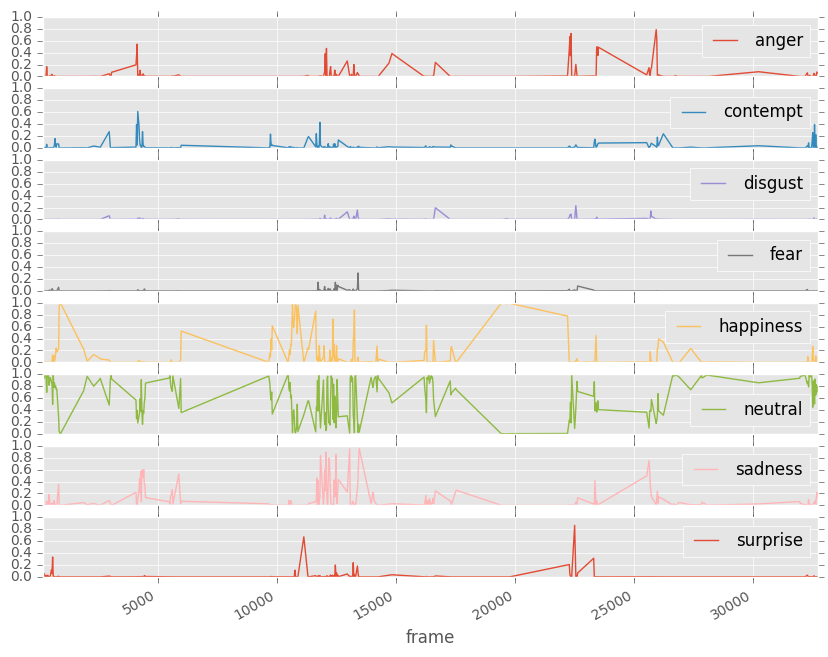

In [16]:
df.plot(subplots=True, figsize=(10, 8), ylim=(0,1))

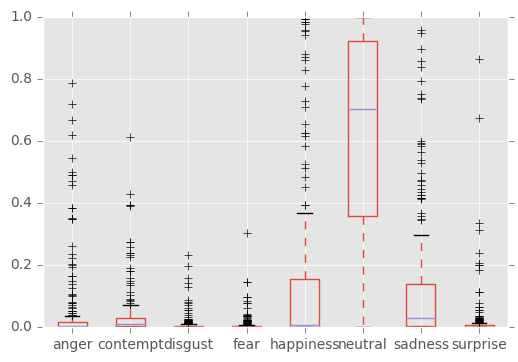

In [17]:
df.plot.box(sym='r+')